<a href="https://colab.research.google.com/github/endophenotype/Graphs/blob/main/%D0%93%D1%80%D0%B0%D1%84%D1%8B_%D1%81%D0%B2%D1%8F%D0%B7%D0%B8_%D1%80%D0%B5%D0%B6%D0%B8%D1%81%D1%91%D1%80_%D1%84%D0%B8%D0%BB%D1%8C%D0%BC%D1%8B_%D0%B0%D0%BA%D1%82%D0%B5%D1%80%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
df = pd.read_csv('IMDB-Movie-Data.csv')
df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


In [ ]:
prod_df = df[df['Director'] == 'Paul Feig'][['Title', 'Director', 'Actors']]
prod_df

,Title,Director,Actors
79,Ghostbusters,Paul Feig,"Melissa McCarthy, Kristen Wiig, Kate McKinnon,..."
208,Bridesmaids,Paul Feig,"Kristen Wiig, Maya Rudolph, Rose Byrne, Terry ..."
248,Spy,Paul Feig,"Melissa McCarthy, Rose Byrne, Jude Law, Jason ..."
663,The Heat,Paul Feig,"Sandra Bullock, Michael McDonald, Melissa McCa..."


In [ ]:
prod_df['Actors'] = prod_df['Actors'].str.split(',', expand=False)
prod_df

,Title,Director,Actors
79,Ghostbusters,Paul Feig,"[Melissa McCarthy, Kristen Wiig, Kate McKinn..."
208,Bridesmaids,Paul Feig,"[Kristen Wiig, Maya Rudolph, Rose Byrne, Te..."
248,Spy,Paul Feig,"[Melissa McCarthy, Rose Byrne, Jude Law, Ja..."
663,The Heat,Paul Feig,"[Sandra Bullock, Michael McDonald, Melissa M..."


In [ ]:
actors = prod_df.explode('Actors')
actors['Actors'] = actors['Actors'].str.strip()
actors

,Title,Director,Actors
79,Ghostbusters,Paul Feig,Melissa McCarthy
79,Ghostbusters,Paul Feig,Kristen Wiig
79,Ghostbusters,Paul Feig,Kate McKinnon
79,Ghostbusters,Paul Feig,Leslie Jones
208,Bridesmaids,Paul Feig,Kristen Wiig
208,Bridesmaids,Paul Feig,Maya Rudolph
208,Bridesmaids,Paul Feig,Rose Byrne
208,Bridesmaids,Paul Feig,Terry Crews
248,Spy,Paul Feig,Melissa McCarthy
248,Spy,Paul Feig,Rose Byrne


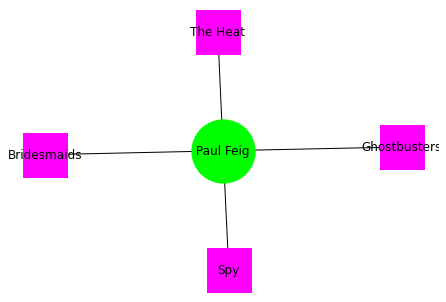

In [ ]:
G = nx.from_pandas_edgelist(actors, source='Title', target='Director')
pos=nx.spring_layout(G)
nx.draw(G, pos=pos, with_labels=True,)
nx.draw_networkx_nodes(G, pos=pos, nodelist=['Paul Feig'],  node_shape='o', node_size=4000, node_color='#0f0')
nx.draw_networkx_nodes(G, pos=pos, nodelist=actors['Title'],  node_shape='s', node_size=2000, node_color='#f0f');

In [ ]:
actors['Actors'] = actors['Actors'].str.replace('\s+', '\n', regex=True)
a = nx.from_pandas_edgelist(actors, source='Title', target='Actors')
a.edges
G.add_edges_from(a.edges)

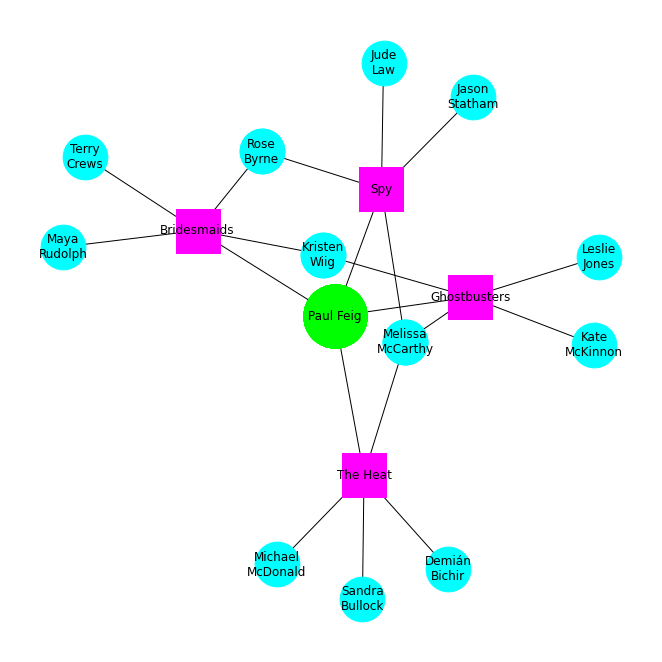

In [ ]:
plt.figure(1,figsize=(9,9))
pos=nx.spring_layout(G)
nx.draw(G, pos=pos, with_labels=True)
nx.draw_networkx_nodes(G, pos=pos, nodelist=actors['Director'], node_shape='o', node_size=4000, node_color='#0f0')
nx.draw_networkx_nodes(G, pos=pos, nodelist=actors['Title'], node_shape='s', node_size=2000, node_color='#f0f')
nx.draw_networkx_nodes(G, pos=pos, nodelist=actors['Actors'], node_shape='o', node_size=2000, node_color='#0ff')

In [ ]:
Actors = bipartite.sets(G)[1]
Actors

{'Demián\nBichir',
 'Jason\nStatham',
 'Jude\nLaw',
 'Kate\nMcKinnon',
 'Kristen\nWiig',
 'Leslie\nJones',
 'Maya\nRudolph',
 'Melissa\nMcCarthy',
 'Michael\nMcDonald',
 'Paul Feig',
 'Rose\nByrne',
 'Sandra\nBullock',
 'Terry\nCrews'}

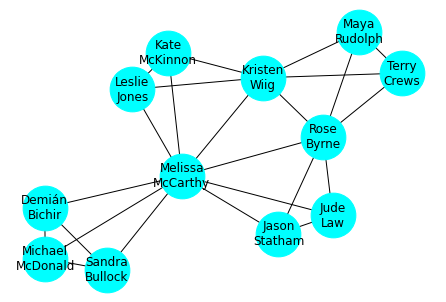

In [ ]:
A = bipartite.projected_graph(G, Actors)
A.remove_node('Paul Feig')
nx.draw(A, with_labels=True, node_shape='o', node_size=2000, node_color='#0ff')

In [ ]:
calculation = [dict(nx.degree(A)), nx.closeness_centrality(A), nx.betweenness_centrality(A), nx.clustering(A)]
df = pd.DataFrame(calculation, index=['Degree','Closeness','Betweenness','Clust.coeff']).T
df.set_index(i.replace('\n', ' ') for i in df.index)

,Degree,Closeness,Betweenness,Clust.coeff
Kristen Wiig,6.0,0.687500,0.163636,0.466667
Jude Law,3.0,0.578947,0.000000,1.000000
Leslie Jones,3.0,0.578947,0.000000,1.000000
Jason Statham,3.0,0.578947,0.000000,1.000000
Michael McDonald,3.0,0.523810,0.000000,1.000000
Melissa McCarthy,9.0,0.846154,0.545455,0.277778
Rose Byrne,6.0,0.687500,0.163636,0.466667
Sandra Bullock,3.0,0.523810,0.000000,1.000000
Maya Rudolph,3.0,0.500000,0.000000,1.000000
Demián Bichir,3.0,0.523810,0.000000,1.000000
